### Project Description
Estimate the value of houses in Ames, Iowa, using 79 explanatory variables. The dataset is fairly small, with only 1460 training samples. The 79 features in the dataset are a mix of categorical and numerical features, and leave a lot of room for feature engineering.

This notebook merely preprocesses the data.

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [33]:
# import data
data = pd.read_csv('data/AmesHousing.csv')
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### OVERVIEW

There are multiple types of variables. Integers, floats, strings, NaN's. Use df.info() to gain detailed insight.


In [34]:
# display data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

There are 2930 entries, numbered 0 to 2929, with **81 different features**. The **target feature** is 'SalePrice'. 

Out of all the columns there are several that have missing values. For instance, 'Alley', 'Pool QC', 'Fence', and 'Misc Feature'. These need to be fixed. 

### Cleaning the data

In [35]:
# remove irrelevant or uniquely identifying features
clean_data = data.drop(['Order', 'PID'], axis=1)
clean_data.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [36]:
# get overview of missing values
clean_data.isnull()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2926,False,False,True,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2927,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2928,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [37]:
clean_data.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

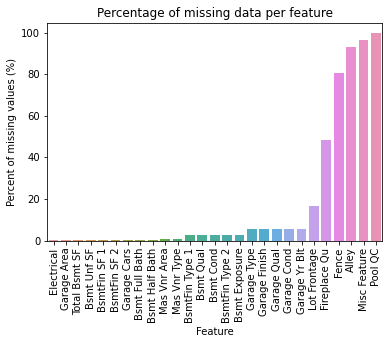

Electrical         0.034130
Garage Area        0.034130
Total Bsmt SF      0.034130
Bsmt Unf SF        0.034130
BsmtFin SF 1       0.034130
BsmtFin SF 2       0.034130
Garage Cars        0.034130
Bsmt Full Bath     0.068259
Bsmt Half Bath     0.068259
Mas Vnr Area       0.784983
Mas Vnr Type       0.784983
BsmtFin Type 1     2.730375
Bsmt Qual          2.730375
Bsmt Cond          2.730375
BsmtFin Type 2     2.764505
Bsmt Exposure      2.832765
Garage Type        5.358362
Garage Finish      5.426621
Garage Qual        5.426621
Garage Cond        5.426621
Garage Yr Blt      5.426621
Lot Frontage      16.723549
Fireplace Qu      48.532423
Fence             80.477816
Alley             93.242321
Misc Feature      96.382253
Pool QC           99.556314
dtype: float64

In [38]:
def missing_data(df):
    ''' Calculates and returns the percentage of missing data per feature. '''
    percentage = 100 * df.isnull().sum() / len(df)
    
    # sort in ascending order
    return percentage[percentage > 0].sort_values()

percent_missing_data = missing_data(clean_data)

sns.barplot(x = percent_missing_data.index, y = percent_missing_data)
plt.title('Percentage of missing data per feature')
plt.xlabel('Feature')
plt.ylabel('Percent of missing values (%)')
plt.xticks(rotation = 90)
plt.show()

percent_missing_data

### Chosing how to deal with missing values

There are the following options/steps:

1. Delete each row (sample) that contains a missing value
2. Delete the whole column (feature) containing the missing values
3. Replace the missing values with some other value

**Option 1**

Delete each row(sample) that contains a missing value.

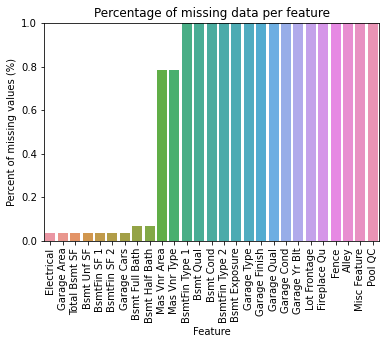

In [39]:
# check which rows to drop, depending on a treshold of 1%
sns.barplot(x = percent_missing_data.index, y = percent_missing_data)
plt.xticks(rotation = 90)

# zoom in on the threshold percentage of 1
plt.ylim(0 , 1)

# set labels
plt.title('Percentage of missing data per feature')
plt.xlabel('Feature')
plt.ylabel('Percent of missing values (%)')
plt.show()

In [40]:
# create list of the features were less than 1% of the values are missing
drop_rows = percent_missing_data[percent_missing_data <= 1]
drop_rows = drop_rows.index.tolist()

# remove the samples with missing values for each of those features 
clean_data = clean_data.dropna(axis = 'index', subset = drop_rows)
display(clean_data)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


**Option 2**

Delete the whole column (feature) containing the missing values

In [41]:
# select the features with more than 20% data missing
drop_features = percent_missing_data[percent_missing_data >= 20]
drop_features = drop_features.index.tolist()

# remove those features
clean_data = clean_data.drop(drop_features, axis = 1)
display(clean_data)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,37.0,7937,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,3,2006,WD,Normal,142500
2926,20,RL,NaN,8885,Pave,IR1,Low,AllPub,Inside,Mod,...,0,0,0,0,0,6,2006,WD,Normal,131000
2927,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,700,7,2006,WD,Normal,132000
2928,20,RL,77.0,10010,Pave,Reg,Lvl,AllPub,Inside,Mod,...,0,0,0,0,0,4,2006,WD,Normal,170000


**Option 3**

Replace the missing values with some other value. For **categorical data**, replace the missing value with 'none'.
For **numerical data**, replace the missing value with the average value of that feature.

First, single out the features that have missing values. 

In [42]:
# select features that have missing values
discuss_features = percent_missing_data[np.logical_and(percent_missing_data > 1, percent_missing_data < 20)]
discuss_features = discuss_features.index.tolist()

print(f"The following features have missing values: {', '.join(discuss_features)}\n")

# check type of data 
# for feature in discuss_features:
#     print(feature, clean_data[feature].unique())

The following features have missing values: BsmtFin Type 1, Bsmt Qual, Bsmt Cond, BsmtFin Type 2, Bsmt Exposure, Garage Type, Garage Finish, Garage Qual, Garage Cond, Garage Yr Blt, Lot Frontage



In [43]:
# replace missing values
def replace_values(discussed_df):
    """
    This function replaces the missing values in the dataframe. If the missing
    value is in a categorical feature, we replace the value for a 'None' string. 
    In this case, you can still use that feature. For the numeric features, we 
    replaced the missing values with the average number of that feature. 
    
    """
    for feature in discussed_df:
        # single out categorical features and replace missing value with none
        if type(clean_data[feature][0]) == str:
            clean_data[feature] = clean_data[feature].fillna('None')

        # single out numerical features and replace missing value with mean
        else: 
            clean_data[feature] = clean_data[feature].fillna(clean_data[feature].mean())
    return clean_data
        
# check if all missing values are replaced
clean_data = replace_values(discuss_features)
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2903 entries, 0 to 2929
Data columns (total 75 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2903 non-null   int64  
 1   MS Zoning        2903 non-null   object 
 2   Lot Frontage     2903 non-null   float64
 3   Lot Area         2903 non-null   int64  
 4   Street           2903 non-null   object 
 5   Lot Shape        2903 non-null   object 
 6   Land Contour     2903 non-null   object 
 7   Utilities        2903 non-null   object 
 8   Lot Config       2903 non-null   object 
 9   Land Slope       2903 non-null   object 
 10  Neighborhood     2903 non-null   object 
 11  Condition 1      2903 non-null   object 
 12  Condition 2      2903 non-null   object 
 13  Bldg Type        2903 non-null   object 
 14  House Style      2903 non-null   object 
 15  Overall Qual     2903 non-null   int64  
 16  Overall Cond     2903 non-null   int64  
 17  Year Built    

## Dealing with categorical features who are classified as numeric features
Some features in this dataset are stored as numeric data, but we saw in the given data that those are actually categorical features. That's why we convert those numeric data to string values, so they get the same treatment as categorical features.

The only feature that is wrongly classified is: MS SubClass (the building class)

In [44]:
clean_data["MS SubClass"] = clean_data["MS SubClass"].apply(str)

## Numerical feature selection

First, plot numerical features in relation to Sale Price.

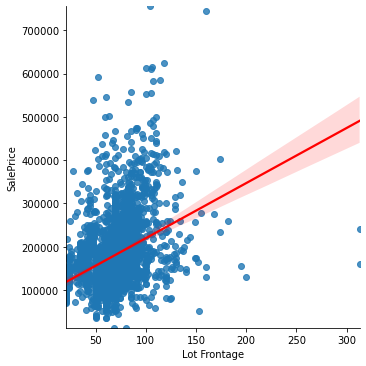

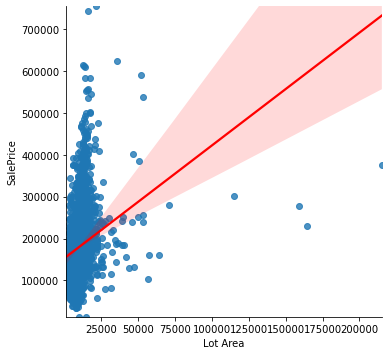

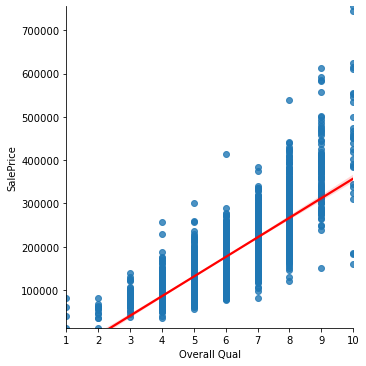

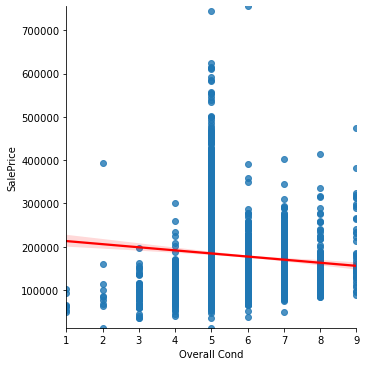

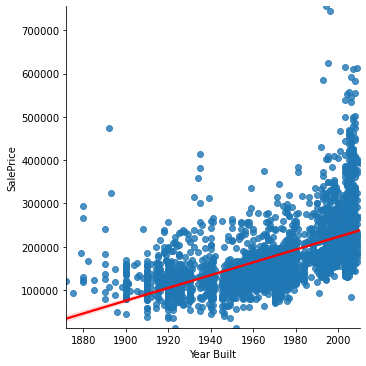

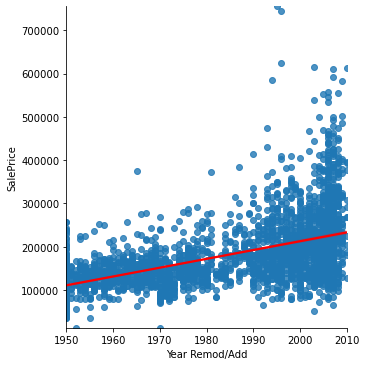

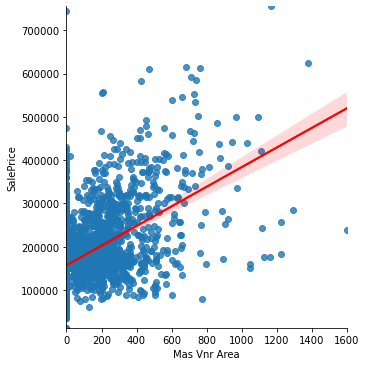

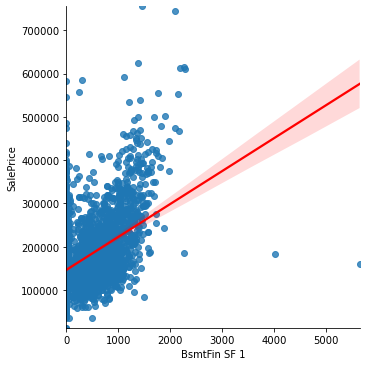

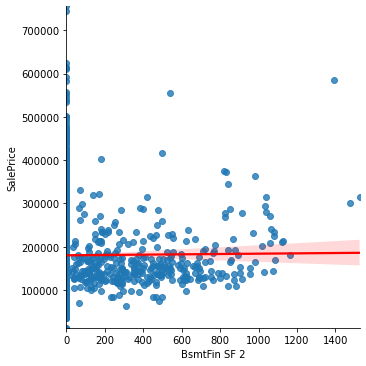

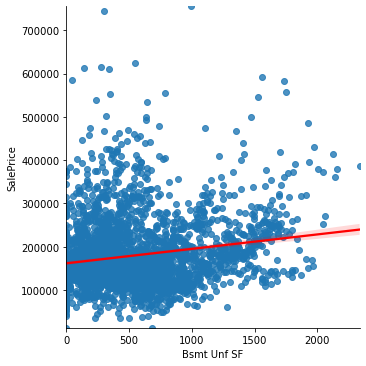

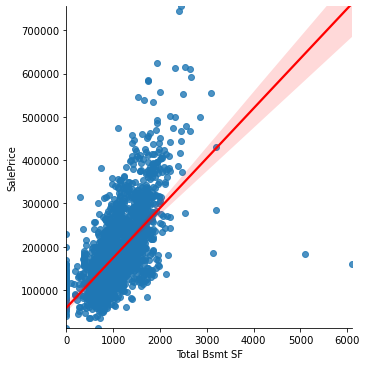

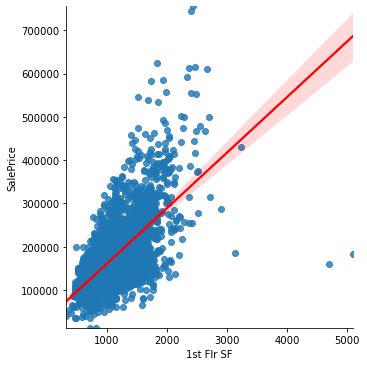

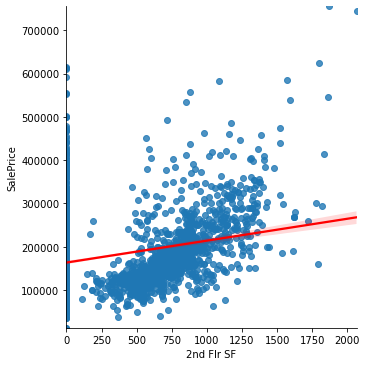

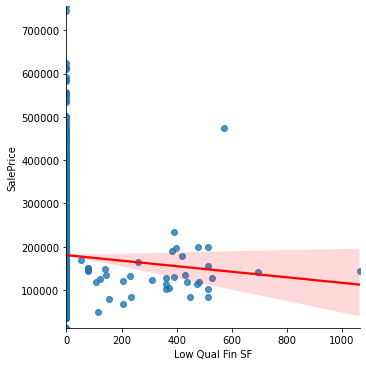

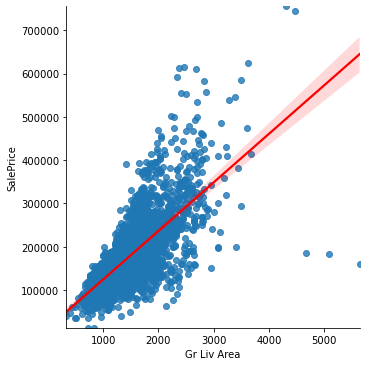

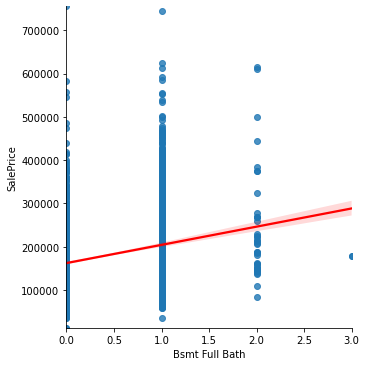

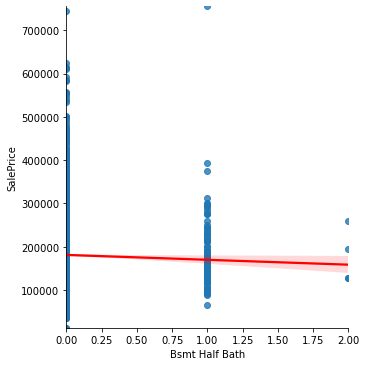

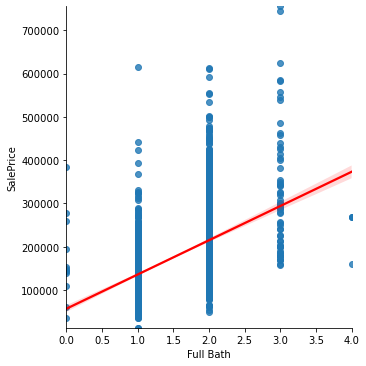

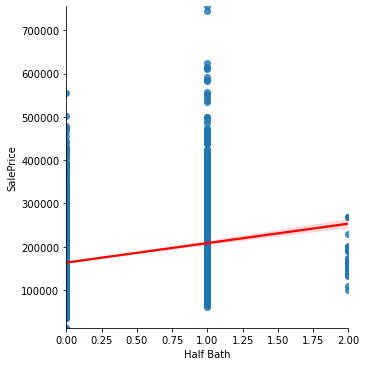

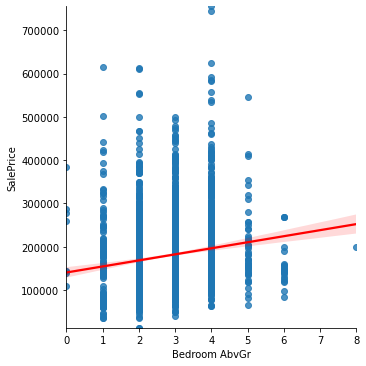

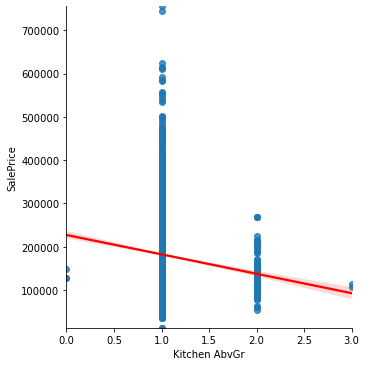

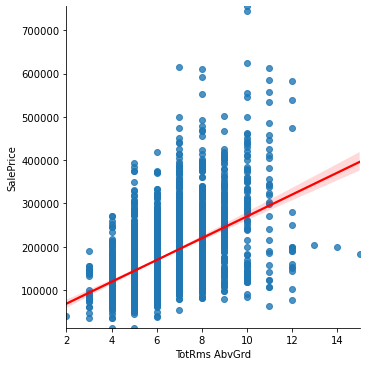

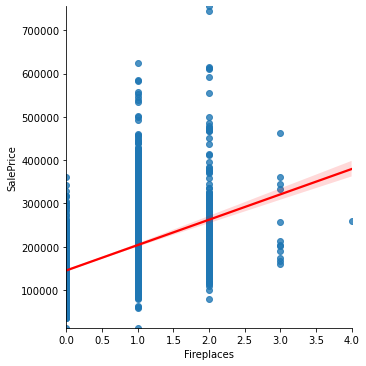

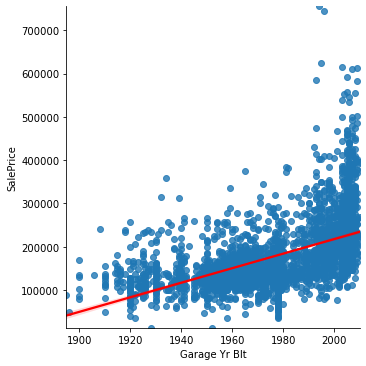

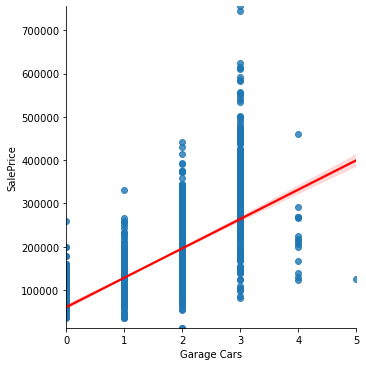

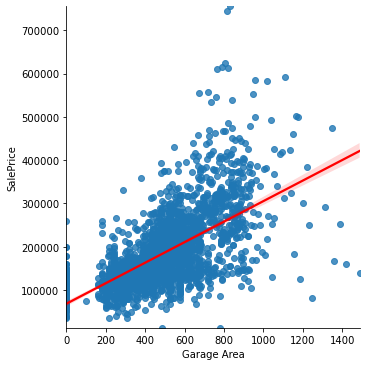

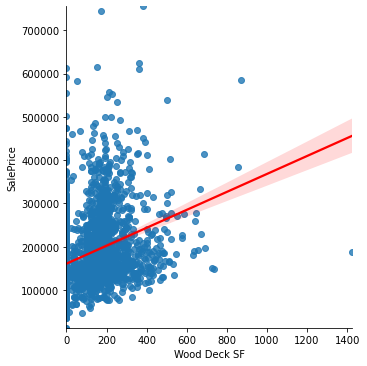

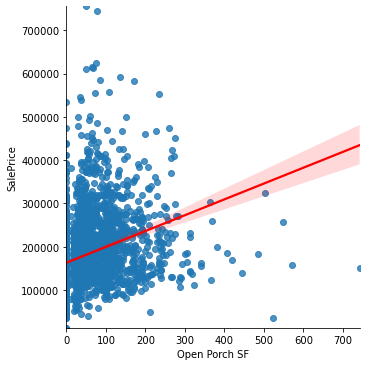

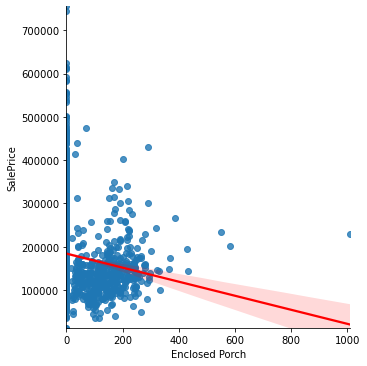

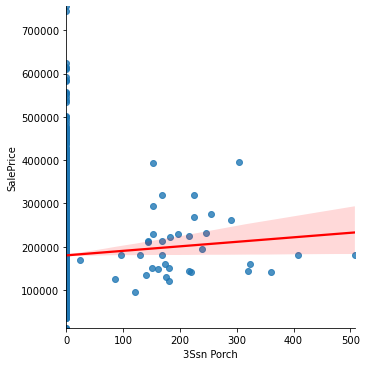

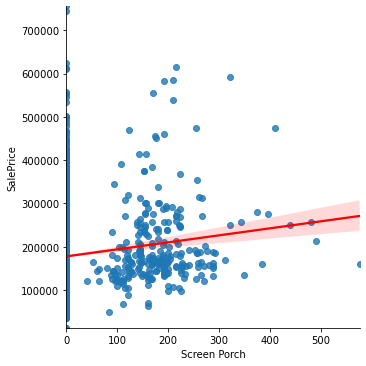

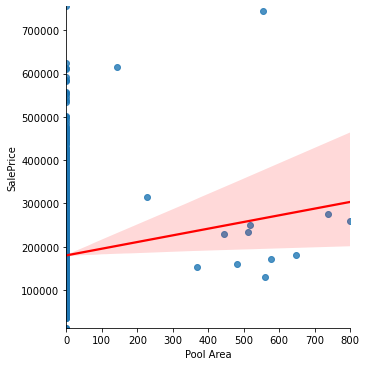

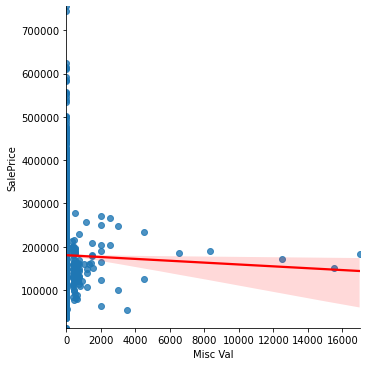

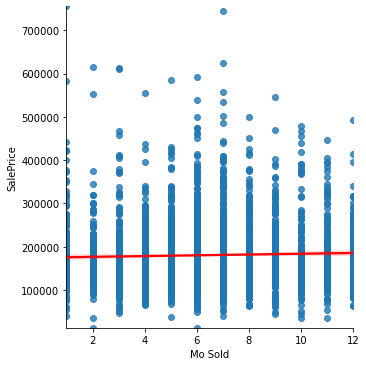

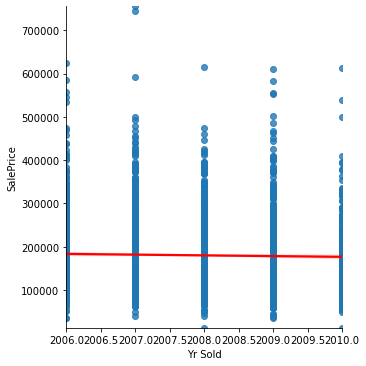

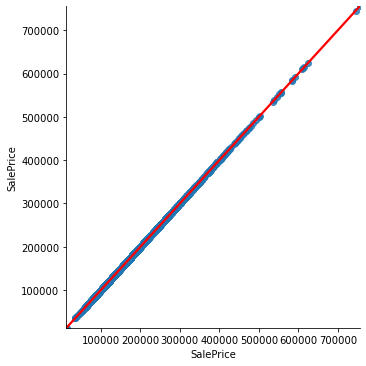

In [45]:
max_price = clean_data['SalePrice'].max()
min_price = clean_data['SalePrice'].min()

# plot numerical features
for feature in clean_data:
    if type(clean_data[feature][0]) != str:
        sns.lmplot(x = feature, y = 'SalePrice', data = clean_data, line_kws={'color': 'red'})
        plt.ylim(min_price, max_price)
        plt.show()


### Select relevant numerical features based on correlation

Numerical features are selected based on their correlation with Sale Price and their respective correlations. The following values were used to determine a correlation.

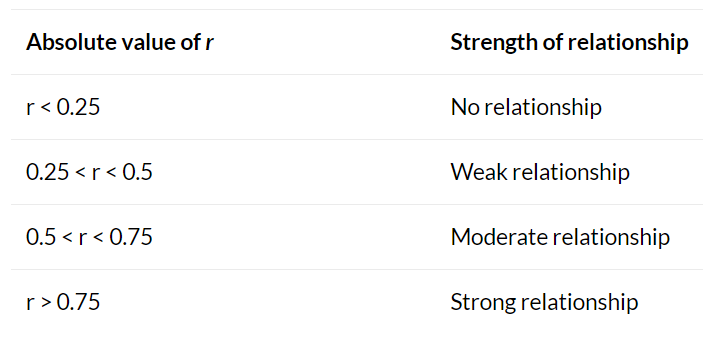



First, we will look at the correlation between each feature and sale price.

Then we will look whether the features are correlated to other features. When the correlation between two features is higher than 0.9, only one of the two features will be used.

In [46]:
# compute correlations for every feature with the feature sale price
price_correlations = abs(clean_data.corr()['SalePrice'].sort_values())

# determine features with weak, moderate, and strong correlations to sale price
weak_cor = price_correlations[price_correlations < 0.25]
moderate_cor = price_correlations[np.logical_and(price_correlations < 0.75, price_correlations > 0.5)]
strong_cor = price_correlations[price_correlations > 0.75] 

print(f'These features have a weak correlation to selling price\n{weak_cor}\n')
print(f'These features have a moderate correlation to selling price\n{moderate_cor}\n')
print(f'These features have a strong correlation to selling price\n{strong_cor}\n')

# determine relevant numerical features
relevant_num_features = price_correlations[price_correlations > 0.5].index
print(f"Relevant features are: {', '.join(relevant_num_features)}")

These features have a weak correlation to selling price
Enclosed Porch     0.130235
Kitchen AbvGr      0.120268
Overall Cond       0.099796
Low Qual Fin SF    0.037359
Bsmt Half Bath     0.034763
Yr Sold            0.027831
Misc Val           0.015326
BsmtFin SF 2       0.008022
Mo Sold            0.030556
3Ssn Porch         0.032927
Pool Area          0.069103
Screen Porch       0.114262
Bedroom AbvGr      0.144928
Bsmt Unf SF        0.183368
Name: SalePrice, dtype: float64

These features have a moderate correlation to selling price
Mas Vnr Area      0.508606
Garage Yr Blt     0.514897
Year Remod/Add    0.532265
Full Bath         0.546100
Year Built        0.558468
1st Flr SF        0.625499
Total Bsmt SF     0.634647
Garage Area       0.639161
Garage Cars       0.647001
Gr Liv Area       0.708248
Name: SalePrice, dtype: float64

These features have a strong correlation to selling price
Overall Qual    0.799121
SalePrice       1.000000
Name: SalePrice, dtype: float64

Relevant featur

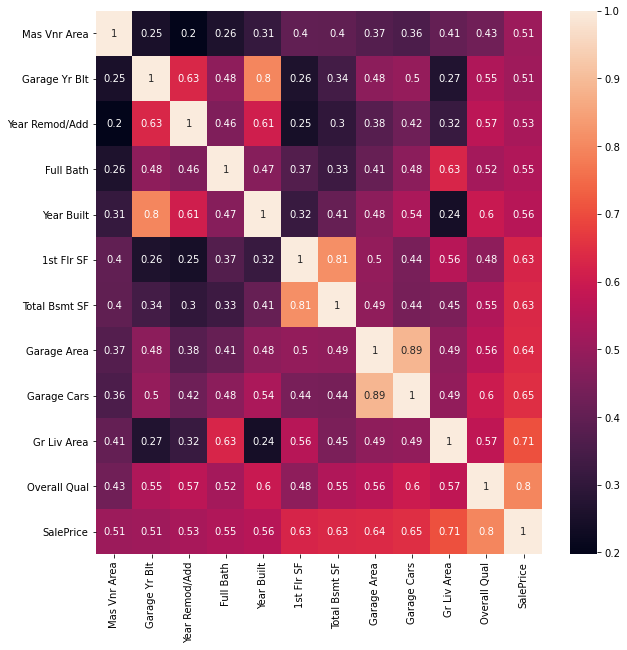

In [47]:
# creates a heatmap
correlation_features = clean_data[relevant_num_features].corr()
plt.figure(figsize = (10, 10))
sns.heatmap(correlation_features, annot = True)

plt.show()

As seen above, none of the preselected numerical features hold a correlation of 0.9 or higher with eachother. Therefore, all of the features will be selected.

In [48]:
# create dataframe with numerical data
num_data = clean_data[relevant_num_features]
display(num_data)

,Mas Vnr Area,Garage Yr Blt,Year Remod/Add,Full Bath,Year Built,1st Flr SF,Total Bsmt SF,Garage Area,Garage Cars,Gr Liv Area,Overall Qual,SalePrice
0,112.0,1960.000000,1960,1,1960,1656,1080.0,528.0,2.0,1656,6,215000
1,0.0,1961.000000,1961,1,1961,896,882.0,730.0,1.0,896,5,105000
2,108.0,1958.000000,1958,1,1958,1329,1329.0,312.0,1.0,1329,6,172000
3,0.0,1968.000000,1968,2,1968,2110,2110.0,522.0,2.0,2110,7,244000
4,0.0,1997.000000,1998,2,1997,928,928.0,482.0,2.0,1629,5,189900
...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0.0,1984.000000,1984,1,1984,1003,1003.0,588.0,2.0,1003,6,142500
2926,0.0,1983.000000,1983,1,1983,902,864.0,484.0,2.0,902,5,131000
2927,0.0,1977.863438,1992,1,1992,970,912.0,0.0,0.0,970,5,132000
2928,0.0,1975.000000,1975,1,1974,1389,1389.0,418.0,2.0,1389,5,170000


## Select relevant categorical features

In [49]:
# create dataframe with categorical data
cat_data = clean_data.select_dtypes(include = 'object')
display(cat_data.head())

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Electrical,Kitchen Qual,Functional,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,SBrkr,Ex,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal


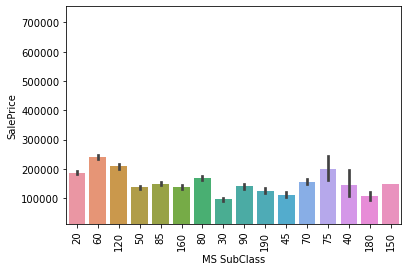

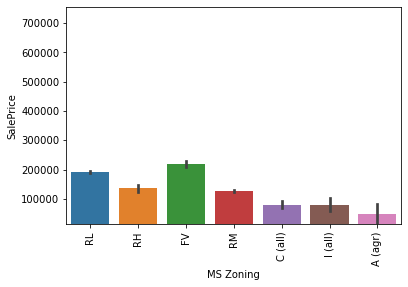

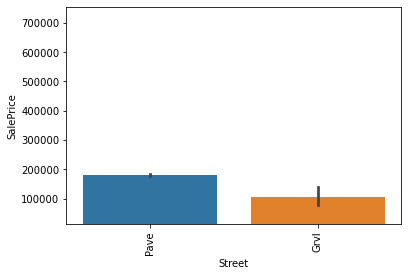

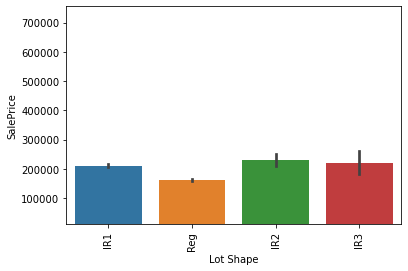

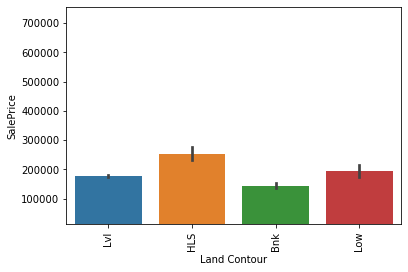

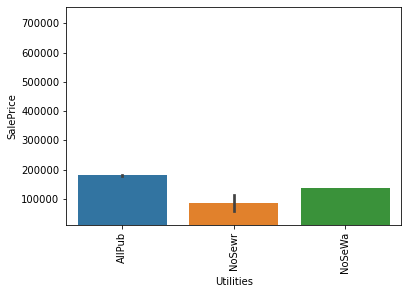

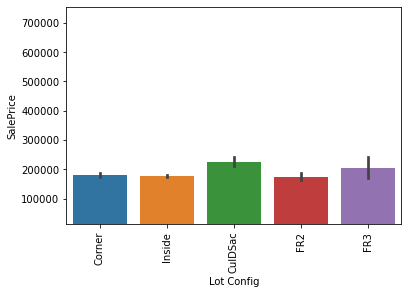

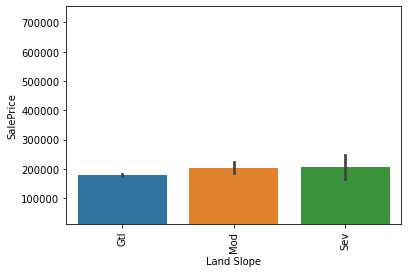

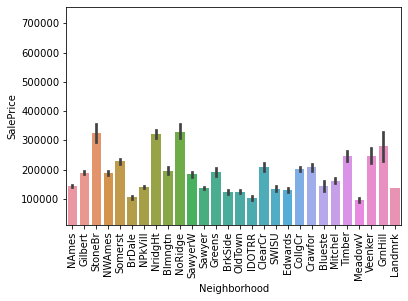

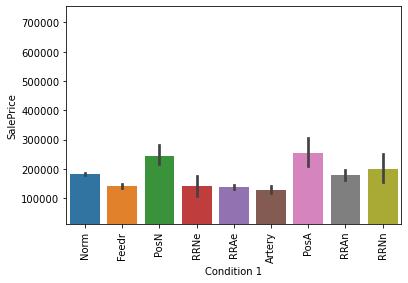

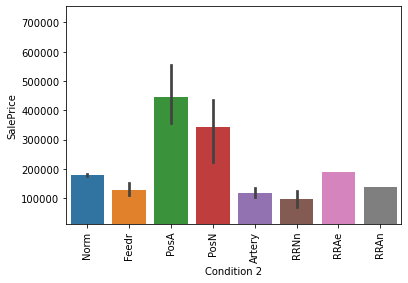

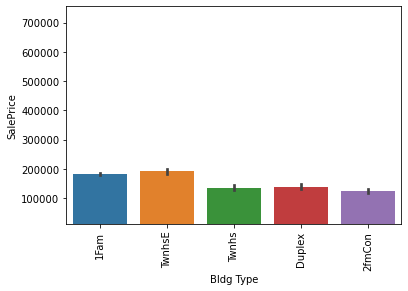

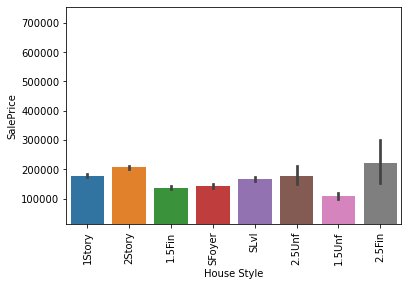

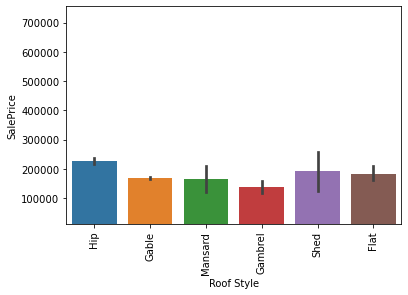

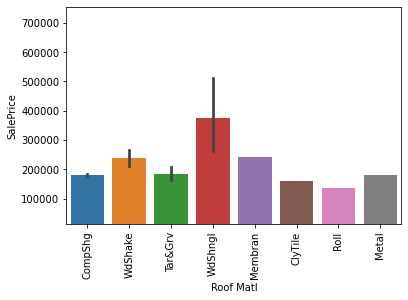

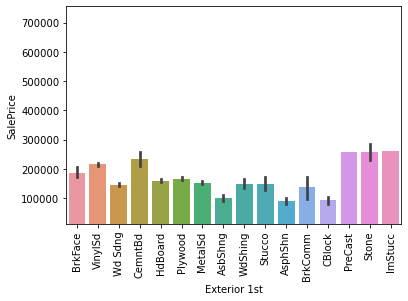

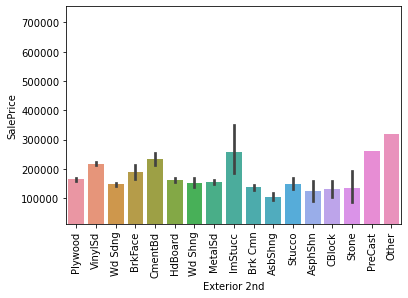

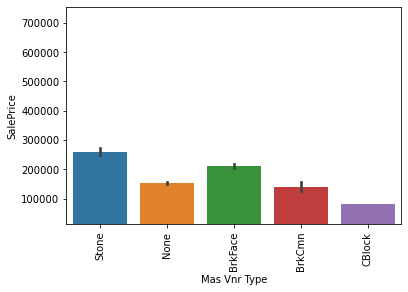

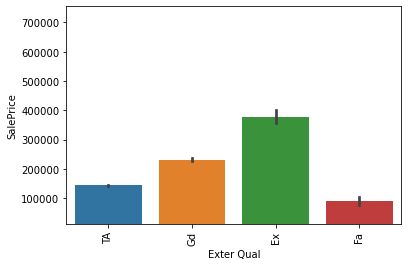

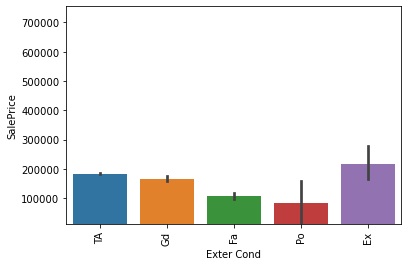

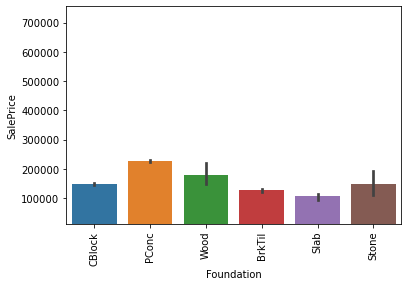

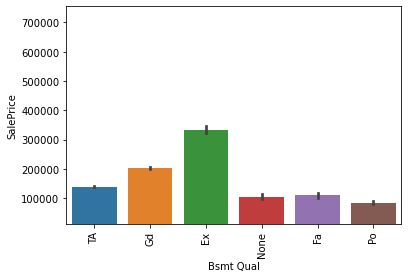

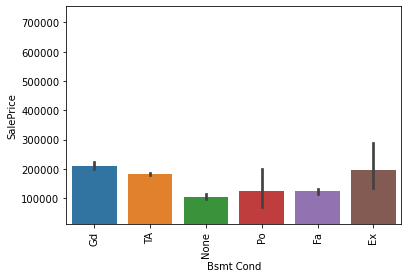

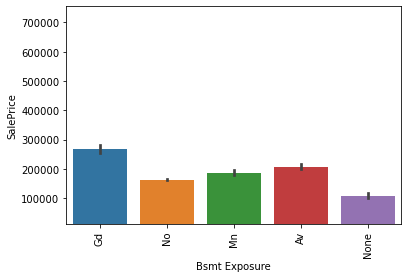

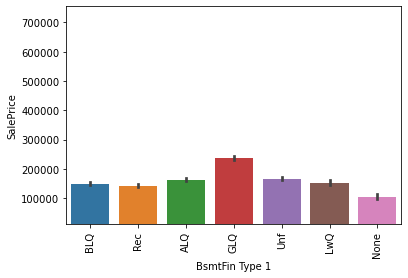

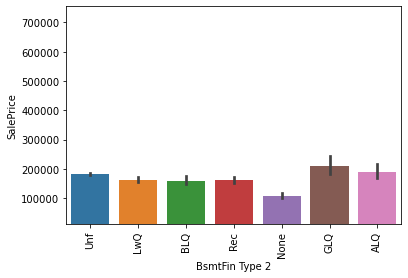

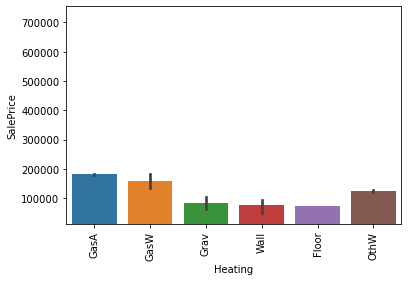

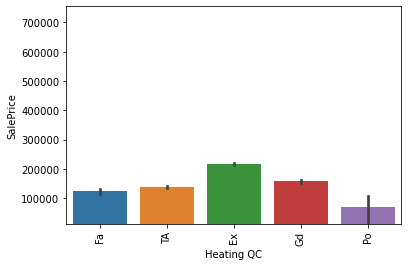

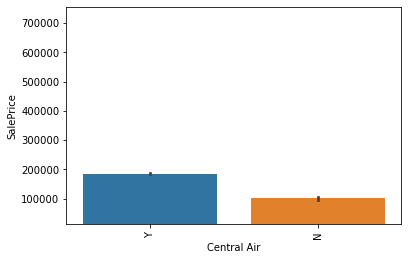

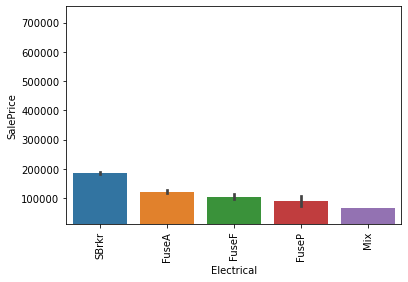

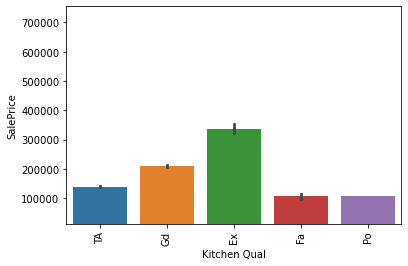

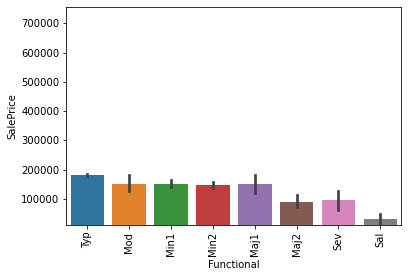

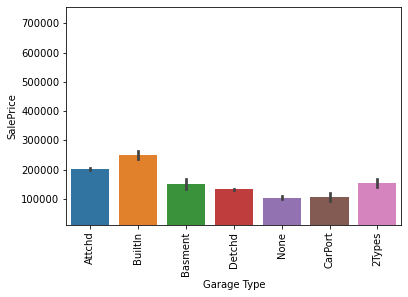

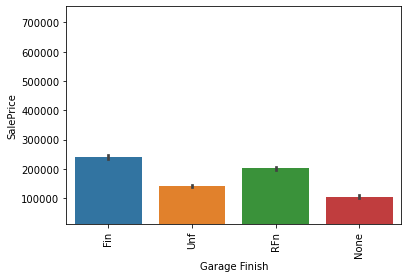

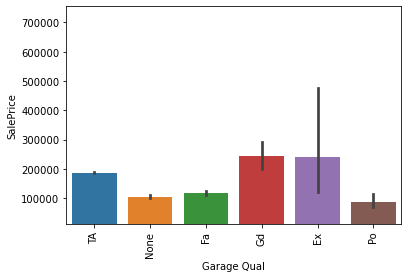

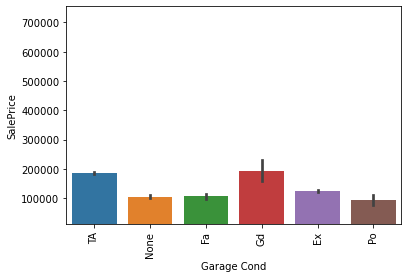

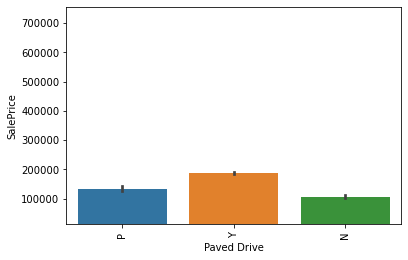

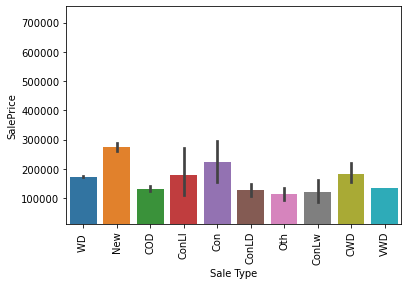

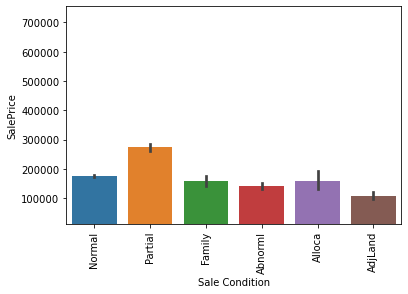

In [50]:
# plot categorical features in relation to sale price
def barplots(cat_data):
    """
    Plots mainly categorical subfeatures as barplots
    """
    for feature in cat_data:
        sns.barplot(x = feature, y = 'SalePrice', data = clean_data)
        plt.xticks(rotation = 90)
        plt.ylim(min_price, max_price)
        plt.show()

barplots(cat_data)

In [51]:
import operator
import itertools

def select_cat_features(cat_data):
    """
    Because some categorical features are not as strong as others to
    influence the housing price, we only store the most useful categorical
    features in a list and return that list to work with. 
    
    for computing the average difference between housing prices of categories 
    per feature, we used some code from: "https://docs.python.org/3/library/itertools.html"
    """
    relevant_cat_features = []

    # set treshold for difference between housing prices
    # housing prices for this feature should have at least 10% average difference between categories
    perc_diff = 0.1
    treshold = (max_price - min_price)* perc_diff

    for feature in cat_data:
        # compute avereages for every feature for each subcategory
        avg_sp = clean_data.groupby(feature).mean().reset_index()

        # we only need the average sale price and convert it to a list
        sp_means = avg_sp['SalePrice'].tolist()

        # compute average difference between housing prices of categories per feature
        diffs = [abs(e[1] - e[0]) for e in itertools.permutations(sp_means, 2)]
        mean_diff = sum(diffs)/len(diffs)
        
        # determine if feature passes the treshold for influenceon housing price
        if mean_diff > treshold:
            print(feature, 'passed treshold')
            relevant_cat_features.append(feature)
            
    print("\ntreshold:", treshold)
            
    return relevant_cat_features

# remove irrelevant features from cat data
rel_cat_features = select_cat_features(cat_data)
print('the relevant categorical features are:', rel_cat_features)

cat_data = clean_data[rel_cat_features]

MS Zoning passed treshold
Neighborhood passed treshold
Condition 2 passed treshold
Roof Matl passed treshold
Mas Vnr Type passed treshold
Exter Qual passed treshold
Bsmt Qual passed treshold
Central Air passed treshold
Kitchen Qual passed treshold
Garage Finish passed treshold
Garage Qual passed treshold

treshold: 74221.1
the relevant categorical features are: ['MS Zoning', 'Neighborhood', 'Condition 2', 'Roof Matl', 'Mas Vnr Type', 'Exter Qual', 'Bsmt Qual', 'Central Air', 'Kitchen Qual', 'Garage Finish', 'Garage Qual']


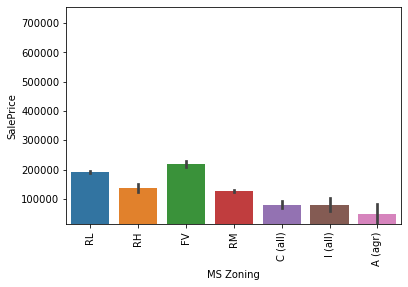

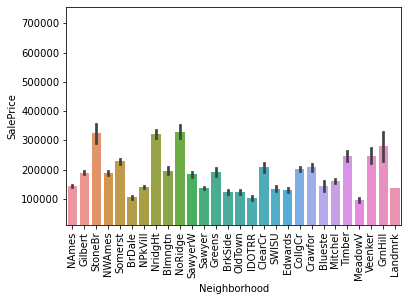

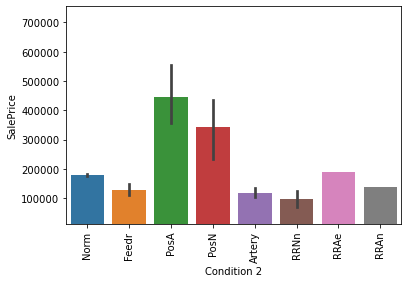

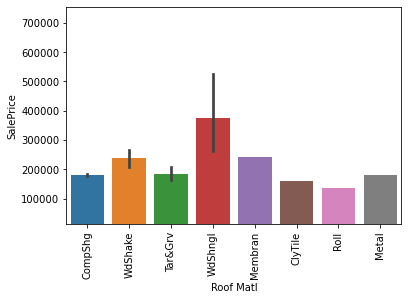

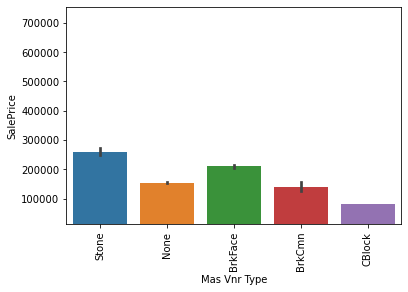

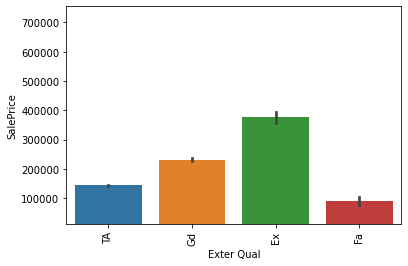

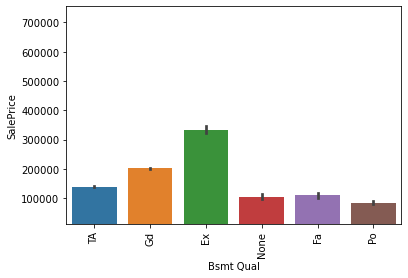

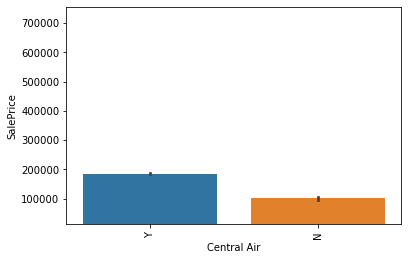

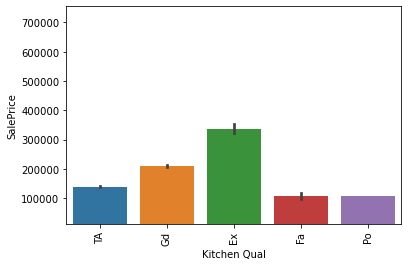

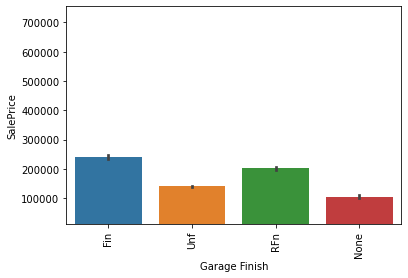

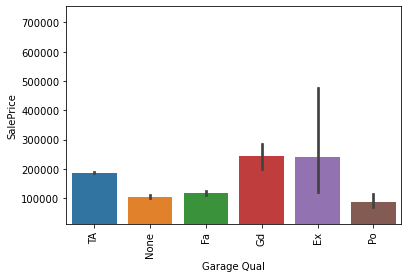

In [52]:
# plot the relevent categorical features in relation to sale price
barplots(rel_cat_features)

As you can see in the plots above, the variance of the subfeatures are relatively high. This means that they're more useful for the regression model

In [53]:
# transform categorical features to one-hot-encoding
# we found an example at the pandas documentation:
# "https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html"
cat_data = pd.get_dummies(cat_data, drop_first=True)

display(cat_data.head())

,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,...,Kitchen Qual_Po,Kitchen Qual_TA,Garage Finish_None,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_None,Garage Qual_Po,Garage Qual_TA
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [54]:
from scipy.stats import zscore

# feature scale numerical data using zscore 
# note that we do not want to normalize our one-hot encoded data, 
# as those are already within [0,1] range
# found examples at stack overflow: "https://stackoverflow.com/a/41713622"
# split data into input and target
target = num_data['SalePrice']
target = np.log(target)
num_data = num_data.drop('SalePrice', axis=1)
num_data = num_data.apply(zscore)

In [24]:
# merge categorical and numerical dataframe
complete_data = pd.concat([cat_data, num_data, target], axis = 1)
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2903 entries, 0 to 2929
Data columns (total 84 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MS Zoning_C (all)     2903 non-null   uint8  
 1   MS Zoning_FV          2903 non-null   uint8  
 2   MS Zoning_I (all)     2903 non-null   uint8  
 3   MS Zoning_RH          2903 non-null   uint8  
 4   MS Zoning_RL          2903 non-null   uint8  
 5   MS Zoning_RM          2903 non-null   uint8  
 6   Neighborhood_Blueste  2903 non-null   uint8  
 7   Neighborhood_BrDale   2903 non-null   uint8  
 8   Neighborhood_BrkSide  2903 non-null   uint8  
 9   Neighborhood_ClearCr  2903 non-null   uint8  
 10  Neighborhood_CollgCr  2903 non-null   uint8  
 11  Neighborhood_Crawfor  2903 non-null   uint8  
 12  Neighborhood_Edwards  2903 non-null   uint8  
 13  Neighborhood_Gilbert  2903 non-null   uint8  
 14  Neighborhood_Greens   2903 non-null   uint8  
 15  Neighborhood_GrnHill 

In [29]:
# check ditribution of data
display(complete_data.describe())

,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,...,Year Remod/Add,Full Bath,Year Built,1st Flr SF,Total Bsmt SF,Garage Area,Garage Cars,Gr Liv Area,Overall Qual,SalePrice
count,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,...,2.903000e+03,2.903000e+03,2.903000e+03,2.903000e+03,2.903000e+03,2.903000e+03,2.903000e+03,2.903000e+03,2.903000e+03,2903.000000
mean,0.008612,0.045470,0.000689,0.009301,0.776783,0.158457,0.003445,0.010334,0.036858,0.015157,...,4.274550e-15,7.579959e-17,-2.477025e-15,8.526498e-17,9.299982e-17,6.635332e-17,1.621545e-17,2.496950e-16,-3.767798e-16,180393.842921
std,0.092415,0.208369,0.026243,0.096007,0.416475,0.365232,0.058601,0.101148,0.188447,0.122197,...,1.000172e+00,1.000172e+00,1.000172e+00,1.000172e+00,1.000172e+00,1.000172e+00,1.000172e+00,1.000172e+00,1.000172e+00,79814.696125
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.635364e+00,-2.833282e+00,-3.280805e+00,-2.122756e+00,-2.388209e+00,-2.194355e+00,-2.317368e+00,-2.306471e+00,-3.608066e+00,12789.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-9.161463e-01,-1.019607e+00,-5.999242e-01,-7.257515e-01,-5.875938e-01,-7.099693e-01,-1.003952e+00,-7.407328e-01,-7.710629e-01,129100.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.263942e-01,7.940686e-01,6.202181e-02,-1.914134e-01,-1.388600e-01,3.106219e-02,3.094650e-01,-1.144375e-01,-6.181207e-02,160000.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.538208e-01,7.940686e-01,9.556489e-01,5.785485e-01,5.654816e-01,4.817208e-01,3.094650e-01,4.801467e-01,6.474387e-01,213000.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.241508e+00,4.421419e+00,1.286622e+00,1.013741e+01,1.149414e+01,4.718841e+00,4.249715e+00,8.213705e+00,2.775191e+00,755000.000000


In [27]:
# export final dataframe to csv file
complete_data.to_csv('data/AmesHousingPreprocessed.csv')
cat_data.to_csv('data/AmesHousingCatData.csv')
num_data.to_csv('data/AmesHousingNumData.csv')
